# Postprocessing and plots

The outputlib module
https://oemof.readthedocs.io/en/stable/api/oemof.outputlib.html

## Imports pandas, matplotlib and oemof

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

import oemof.solph as solph
import oemof.outputlib as outputlib

In [4]:
%matplotlib inline
rcParams['figure.figsize'] = [20.0, 7.0]
rcParams['font.size'] = 25

## Restore the energysystem with results

In [5]:
energysystem = solph.EnergySystem()
energysystem.restore(dpath=None, filename=None)

'Attributes restored from: /home/jaan/.oemof/dumps/es_dump.oemof'

## Filter the dictionary using outputlib
### Get all the flows into and out of the electricity bus


In [36]:
results_bus_el = outputlib.views.node(energysystem.results['main'], 'electricity')['sequences']
# results_bus_th = outputlib.views.node(energysystem.results['main'], 'heat')['sequences']
results_bus_el.columns = [col[0] for col in results_bus_el.columns]
results_bus_el.index.name = 'timeindex'
results_bus_el

,"(chp_gas, electricity)","(electricity, demand_el)","(electricity, excess_el)","(electricity, storage_el)","(pp_coal, electricity)","(pv, electricity)","(shortage_el, electricity)","(storage_el, electricity)","(wind, electricity)"
timeindex,,,,,,,,,
2016-01-01 00:00:00,13.538253,52.169653,0.0,0.000000,20.2,0.000000,0.0,0.000000,18.43140
2016-01-01 01:00:00,13.339353,52.169653,0.0,0.000000,20.2,0.000000,0.0,0.000000,18.63030
2016-01-01 02:00:00,8.429744,47.392644,0.0,0.000000,20.2,0.000000,0.0,0.000000,18.76290
2016-01-01 03:00:00,6.234872,45.197772,0.0,0.000000,20.2,0.000000,0.0,0.000000,18.76290
2016-01-01 04:00:00,7.282189,44.189789,0.0,0.000000,20.2,0.000000,0.0,0.000000,16.70760
2016-01-01 05:00:00,9.865656,42.397456,0.0,0.000000,20.2,0.000000,0.0,0.000000,12.33180
2016-01-01 06:00:00,6.540622,39.072422,0.0,0.000000,20.2,0.000000,0.0,0.000000,12.33180
2016-01-01 07:00:00,6.321109,38.786609,0.0,0.000000,20.2,0.000000,0.0,0.000000,12.26550
2016-01-01 08:00:00,6.499229,39.558959,0.0,0.000000,20.2,0.594230,0.0,0.000000,12.26550


### Prepare input parameters for postprocessing

In [37]:
params = energysystem.params
params

{("<oemof.solph.network.Transformer: 'chp_gas'>",
  None): {'scalars': conversion_factors_electricity                0.3
  conversion_factors_gas                          1
  conversion_factors_heat                       0.4
  label                             (chp_gas, None)
  from                                      chp_gas
  to                                           None
  dtype: object, 'sequences': Empty DataFrame
  Columns: []
  Index: []},
 ("<oemof.solph.network.Transformer: 'chp_gas'>",
  "<oemof.solph.network.Bus: 'electricity'>"): {'scalars': fixed                                       False
  label                      (chp_gas, electricity)
  max                                             1
  min                                             0
  negative_gradient_costs                         0
  nominal_value                                  30
  positive_gradient_costs                         0
  variable_costs                                 42
  from                

In [40]:
def convert_params_to_dataframe(params):
    r"""
    
    """    
    param_df = pd.DataFrame()
    for key in params.keys():
        new_row = params[key]['scalars']
        label = tuple(map(str, key)) if isinstance(key, tuple) else str(key)
        new_row['label'] = label
        new_row['from'] = label[0]
        new_row['to'] = label[1]
        param_df = param_df.append(new_row, ignore_index=True)
        
    param_df['fixed'] = param_df['fixed'].astype('bool')
    param_df = param_df[param_df.columns.drop('label').insert(0, 'label')]
    param_df = param_df.set_index('label')
    return param_df

params_df = convert_params_to_dataframe(params)
params_df.head()

,from,to,fixed,max,min,negative_gradient_costs,positive_gradient_costs,variable_costs,nominal_value,balanced,...,loss_rate,max_storage_level,min_storage_level,nominal_storage_capacity,outflow_conversion_factor,conversion_factors_electricity,conversion_factors_gas,conversion_factors_heat,emission_factor,conversion_factors_coal
label,,,,,,,,,,,,,,,,,,,,,
"(source_gas, None)",source_gas,None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(shortage_el, None)",shortage_el,None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(gas, chp_gas)",gas,chp_gas,False,1.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(pp_coal, electricity)",pp_coal,electricity,False,1.0,0.0,0.0,0.0,25.0,20.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(heat, None)",heat,None,True,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Define color dictionary

Use color palette generators to generate suitable colors, e.g.:     
http://javier.xyz/cohesive-colors/  
https://colourco.de/  
http://seaborn.pydata.org/tutorial/color_palettes.html  

In [41]:
cdict = {('chp_gas', 'electricity'): '#eeac7e',
        ('pp_coal', 'electricity'): '#0f2e2e',
        ('pv', 'electricity'): '#ffde32',
        ('wind', 'electricity'): '#4ca7c3',
        ('electricity', 'demand_el'): '#000000',
        ('electricity', 'storage_el'): '#E04644',
        ('storage_el', 'electricity'): '#B7D968',
        ('electricity', 'excess_el'): '#C748E2',
        ('shortage_el', 'electricity'): '#B576AD'}

## Plot renewable feedin and demand

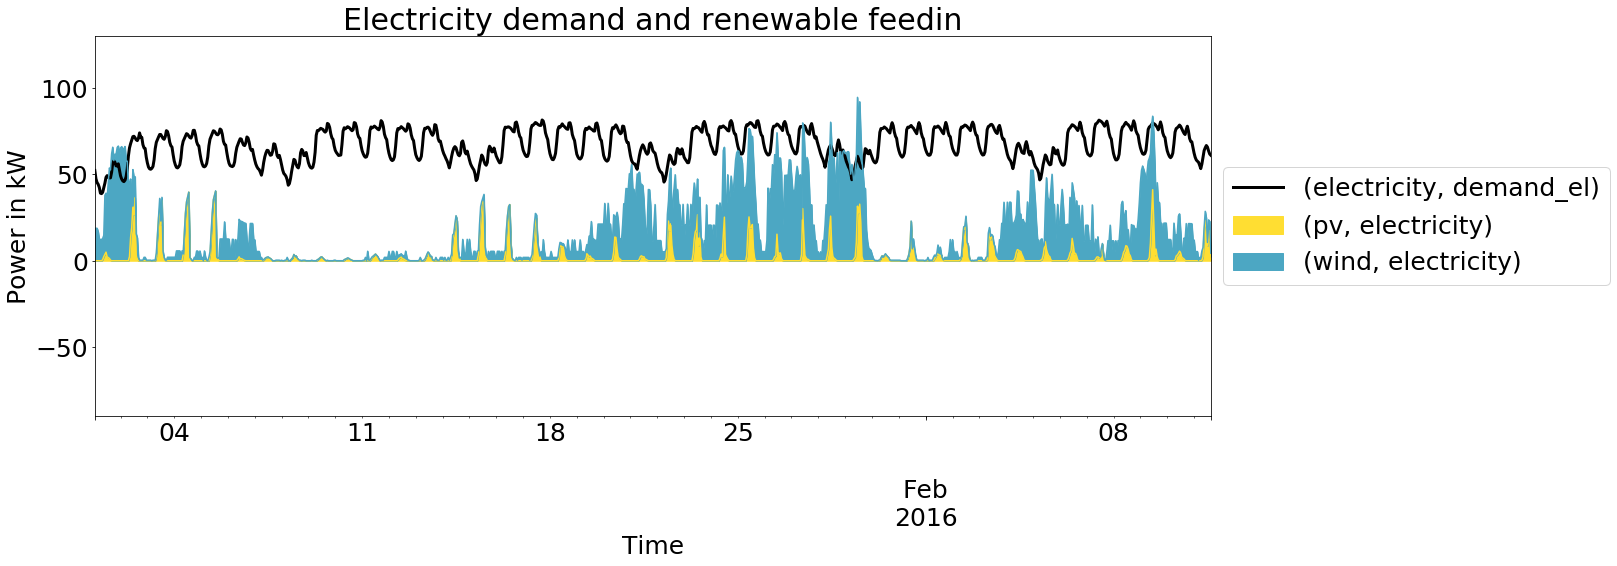

In [42]:
seq_re = results_bus_el[[('pv', 'electricity'), ('wind', 'electricity')]]
seq_demand = results_bus_el[('electricity', 'demand_el')]

range_low = 1
range_high = 1000

fig, ax = plt.subplots()
color = [cdict[column] for column in seq_re.columns]
seq_demand[range_low:range_high].plot(ax=ax, linewidth=3, color='k')
seq_re[range_low:range_high].plot.area(ax=ax, color=color)
ax.set_ylim(-90, 130)
ax.set_ylabel('Power in kW')
ax.set_xlabel('Time')
ax.set_title('Electricity demand and renewable feedin')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) # place legend outside of plot
plt.show()

## Plot all dispatch

In [43]:
produced_el = results_bus_el.drop(('electricity', 'demand_el'), axis=1)
produced_el = produced_el.clip(lower=0)
produced_el[('electricity', 'storage_el')] *= -1

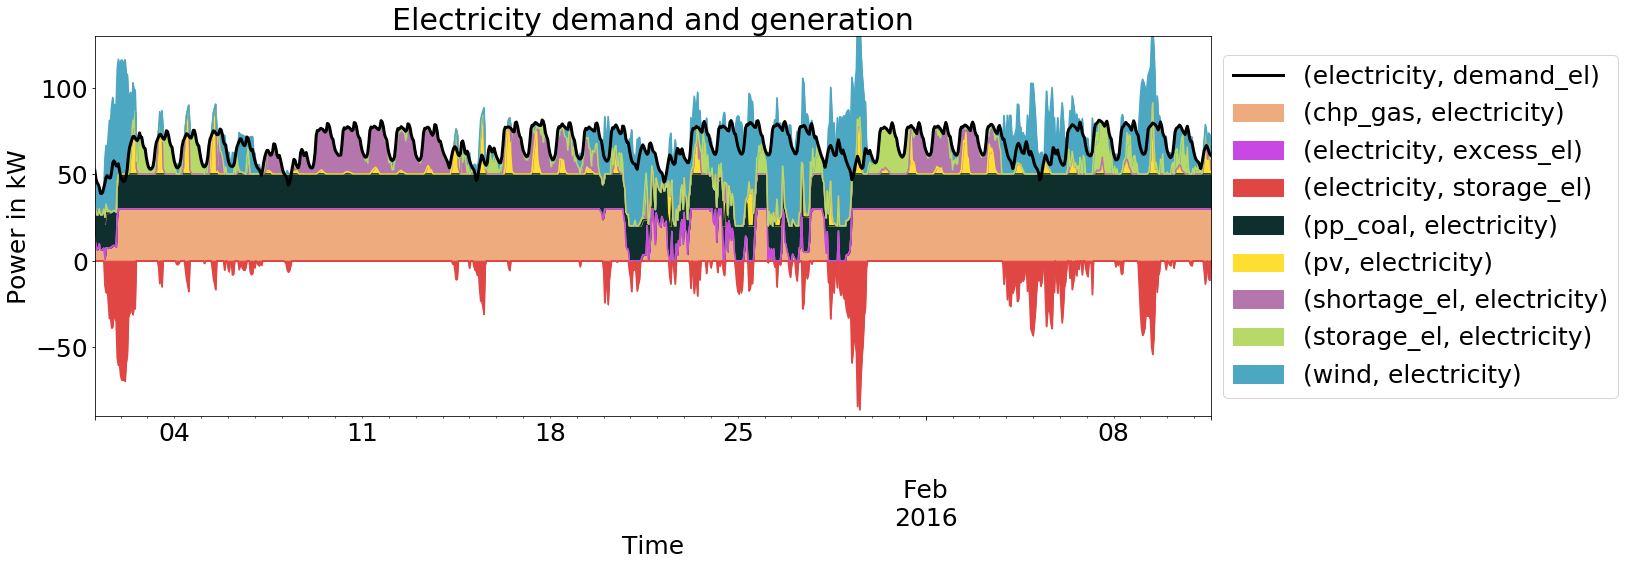

In [44]:
fig, ax = plt.subplots()
color = [cdict[column] for column in produced_el.columns]
produced_el[range_low:range_high].plot.area(ax=ax, color=color)
seq_demand[range_low:range_high].plot(c='k', linewidth=3)
ax.set_ylim(-90, 130)
ax.set_ylabel('Power in kW')
ax.set_xlabel('Time')
ax.set_title('Electricity demand and generation')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) # place legend outside of plot
plt.show()

### Plot Jahresdauerlinie

In [45]:
sorted_sequences = pd.DataFrame()
for column in results_bus_el.columns:
    sorted_sequences[column]=sorted(results_bus_el[column], reverse=True)

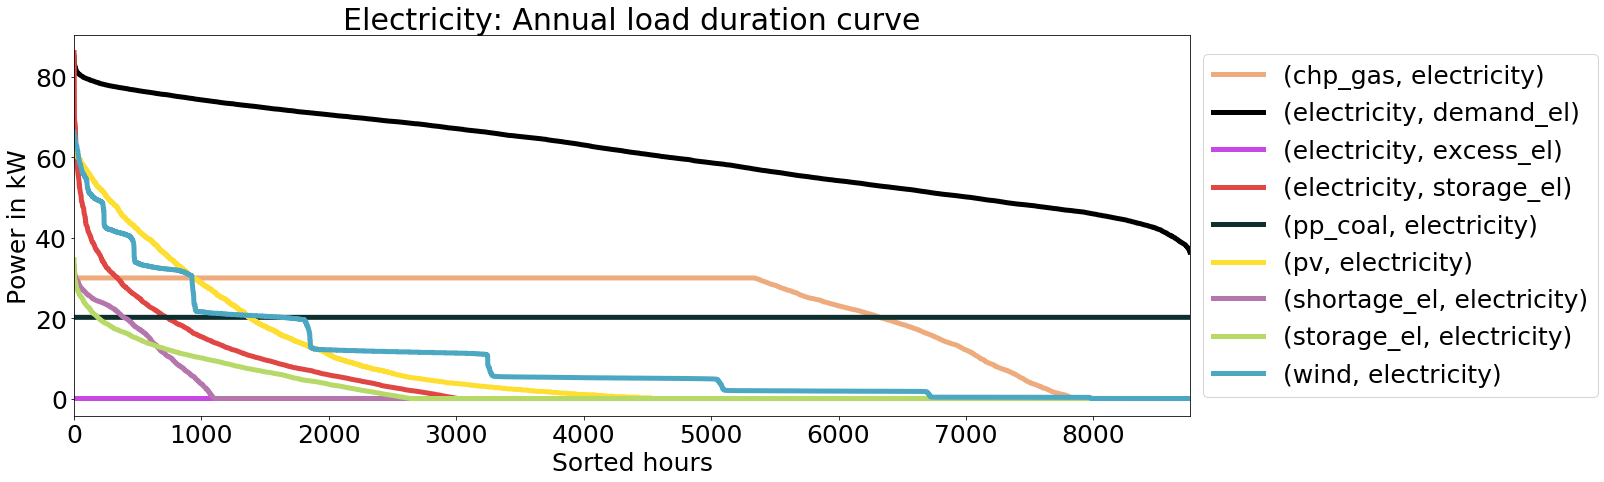

In [46]:
fig, ax = plt.subplots()
color = [cdict[column] for column in sorted_sequences.columns]
sorted_sequences.plot(ax=ax, color=color, linewidth=5)
ax.set_ylabel('Power in kW')
ax.set_xlabel('Sorted hours')
ax.set_title('Electricity: Annual load duration curve')
legend = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) # place legend outside of plot
plt.show()

## Calculate metrics and indicators

### Installierte Leistung für Technologie i
$$P_{inst,i}$$

In [62]:
to_bus_el = [i[1]=='electricity' for i in params_df.index]
params_df_to_el = params_df.loc[to_bus_el]
params_df_to_el

,from,to,fixed,max,min,negative_gradient_costs,positive_gradient_costs,variable_costs,nominal_value,balanced,...,loss_rate,max_storage_level,min_storage_level,nominal_storage_capacity,outflow_conversion_factor,conversion_factors_electricity,conversion_factors_gas,conversion_factors_heat,emission_factor,conversion_factors_coal
label,,,,,,,,,,,,,,,,,,,,,
"(pp_coal, electricity)",pp_coal,electricity,False,1.0,0.0,0.0,0.0,25.0,20.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(shortage_el, electricity)",shortage_el,electricity,False,1.0,0.0,0.0,0.0,100000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(wind, electricity)",wind,electricity,True,1.0,0.0,0.0,0.0,0.0,66.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(storage_el, electricity)",storage_el,electricity,False,1.0,0.0,0.0,0.0,0.0,200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(pv, electricity)",pv,electricity,True,1.0,0.0,0.0,0.0,0.0,65.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(chp_gas, electricity)",chp_gas,electricity,False,1.0,0.0,0.0,0.0,42.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
p_inst = params_df_to_el['nominal_value'].loc[params_df_to_el['nominal_value']>0]
p_inst = p_inst.sort_index()
p_inst

label
(chp_gas, electricity)        30.0
(pp_coal, electricity)        20.2
(pv, electricity)             65.3
(storage_el, electricity)    200.0
(wind, electricity)           66.3
Name: nominal_value, dtype: float64

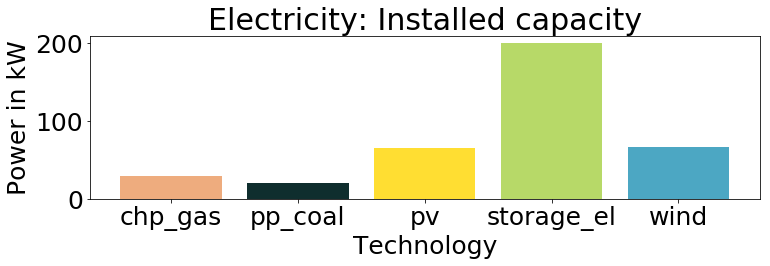

In [79]:
fig, ax = plt.subplots(figsize=(12,3))
color = [cdict[label] for label in p_inst.index]
x = [label[0] for label in p_inst.index]
height = p_inst.values
plt.bar(x=x, height=height, color=color)
ax.set_ylabel('Power in kW')
ax.set_xlabel('Technology')
ax.set_title('Electricity: Installed capacity')
ax.legend().remove()
plt.show()

### Jährliche Energiemenge für Technologie i
$$E_{ges,i} = \sum_t P_{t,i} \cdot \Delta t$$

In [97]:
to_bus_el = [column for column in results_bus_el.columns if column[1]=='electricity']
yearly_energy = results_bus_el[to_bus_el].sum()
yearly_energy = yearly_energy.sort_index()
yearly_energy

(chp_gas, electricity)        200391.705413
(pp_coal, electricity)        176952.000000
(pv, electricity)              70874.122713
(shortage_el, electricity)     17072.087141
(storage_el, electricity)      23757.996211
(wind, electricity)            85427.968459
dtype: float64

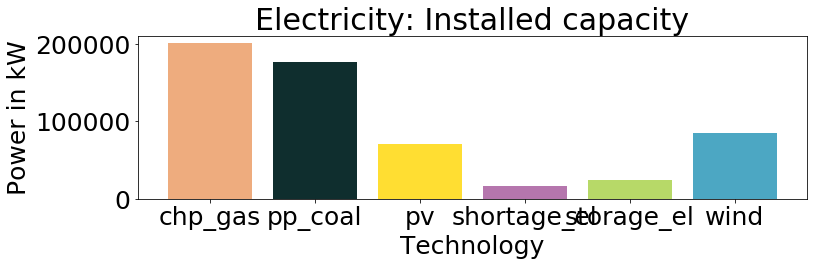

In [98]:
fig, ax = plt.subplots(figsize=(12,3))
x = [label[0] for label in yearly_energy.index]
height = yearly_energy.values
color = [cdict[label] for label in yearly_energy.index]
plt.bar(x=x, height=height, color=color)
ax.set_ylabel('Power in kW')
ax.set_xlabel('Technology')
ax.set_title('Electricity: Installed capacity')
ax.legend().remove()
plt.show()

### Volllaststunden
$$t_{Volllast, i} = \frac{E_{ges,i}}{P_{inst,i}}$$

In [164]:
full_load_hours =  yearly_energy * 1/p_inst
full_load_hours

(chp_gas, electricity)        6679.723514
(pp_coal, electricity)        8760.000000
(pv, electricity)             1085.361757
(shortage_el, electricity)            NaN
(storage_el, electricity)      118.789981
(wind, electricity)           1288.506312
dtype: float64

### Deckungsgrad
$$\frac{\sum_t P_t}{demand}$$

In [ ]:
yearly_energy
yearly_consumption = results_bus_el

### Speicherzyklen
https://github.com/oemof/cydets

In [ ]:
import pydets

### Gesamte Treibhausgasemissionen


In [ ]:
params_df[['label', 'emission_factor']][params_df['emission_factor']>0]
yearly_energy

### Gesamtkosten Betrieb
$$\sum_{i} (C_{FOM,i} + \sum_t P_{t, i} C_{VOM})$$

In [ ]:
params_df[['label', 'variable_costs']][params_df['variable_costs']>0]

### Gesamtkosten Investition
$$\sum_{i} C_{capital,i}$$

### Wärmegestehungskosten
$$F_W \cdot C_{ges}/demand$$

### Stromgestehungskosten

$$F_W \cdot C_{ges}/demand$$